Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - binary_accuracy: 0.6943 - loss: 0.6413 - val_binary_accuracy: 0.8436 - val_loss: 0.4579
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - binary_accuracy: 0.8874 - loss: 0.3874 - val_binary_accuracy: 0.8856 - val_loss: 0.3530
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - binary_accuracy: 0.9161 - loss: 0.2950 - val_binary_accuracy: 0.8887 - val_loss: 0.3234
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - binary_accuracy: 0.9348 - loss: 0.2432 - val_binary_accuracy: 0.8848 - val_loss: 0.3175


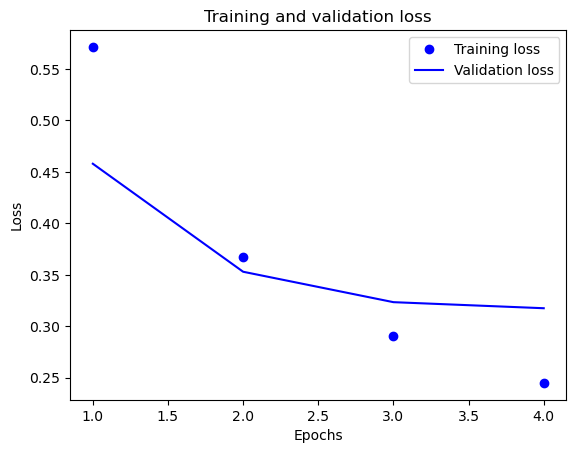

In [5]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
from keras import regularizers
def vectorize_seq(seqs, dimension=10000):
    results = np.zeros((len(seqs), dimension))
    for i, seq in enumerate(seqs):
        results[i,seq] = 1.
    return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

optimizer = optimizers.RMSprop(learning_rate = 0.001)
model.compile(optimizer = optimizer,
              loss = losses.binary_crossentropy, #loss = 'binary_crossentropy'
              metrics = [metrics.binary_accuracy]) # metrics = ['accuracy']
#驗證資料
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 4,
                    batch_size = 512,
                    validation_data = (x_val, y_val))
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
Epochs = range(1, len(loss_values)+1)
plt.plot(Epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(Epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

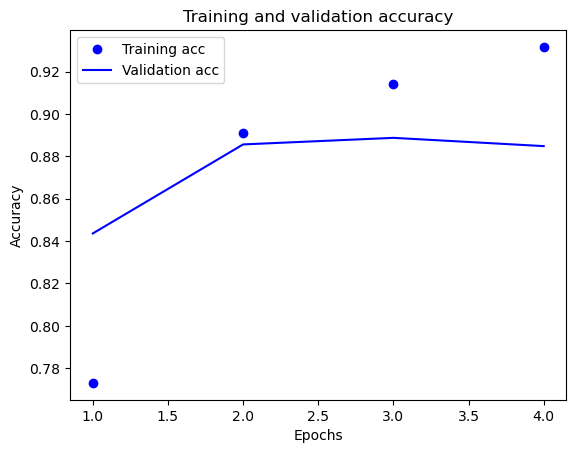

In [6]:
plt.clf()
history_dict.keys()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
plt.plot(Epochs, acc, 'bo', label = 'Training acc')
plt.plot(Epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [7]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step


array([[0.3018399 ],
       [0.99823326],
       [0.9173132 ],
       ...,
       [0.13229185],
       [0.18580148],
       [0.6327156 ]], dtype=float32)